# Exploring simple artificial Neural Networks

This notebook presents a simple neural network classification work using the sklearn library in a simple and standard way. Although it is always preferable to use the tensorflow and keras libraries in this type of work, the purpose here is only to exhibit how neural network parameters and hyperparameters could impact their final performance.

Here, we use the data **Avila** from UCI: https://archive.ics.uci.edu/ml/datasets/Avila#. The Avila data set has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. In this lab, the‘avila-tr.txt'data is used. For your convenience, I have pre-processed an 'CSV' file in the Github.

### Data Set Information:

CLASS DISTRIBUTION (training set)

A: 4286 

B: 5 

C: 103 

D: 352 

E: 1095 

F: 1961 

G: 446 

H: 519 

I: 831 

W: 44 

X: 522 

Y: 266

### Attribute Information:

F1: intercolumnar distance 

F2: upper margin 

F3: lower margin 

F4: exploitation 

F5: row number 

F6: modular ratio 

F7: interlinear spacing 

F8: weight 

F9: peak number 

F10: modular ratio/ interlinear spacing 

Class: A, B, C, D, E, F, G, H, I, W, X, Y

## Import modules

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

## Load the data

In [12]:
# Load the data and show the basic information
data=pd.read_csv("datasets/avila-tr.csv")
print('Data size: (%.f, %.f)\n' % data.shape)
data.head()

Data size: (10430, 11)



,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


## Study the Multi-layer Perceptron model and its parameters
First, I will use the multi-layer percepton to understand the basic usage of artificial neural network models. MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation. MLPClassifier has many parameters to configure. The effects of some parameters and hyperparameters will be empirically proven in the following cells.

### 1. Basic usage of the model

In [13]:
# Specify features and the target
X = data.drop(['Class'], axis = 'columns')
y = data['Class']

# Split the dataset into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Training the MLPClassifier with the default parameters (random_state=42)
clf = MLPClassifier(random_state=42)
clf.fit(X_train, y_train)

# Output the accuracy on training data and test data respectively
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.4f \n' % accuracy)

Accuracy: 0.7584 



In [14]:
# Explore the learned MLP model
print(clf)
print('\n# of layers (including the input layer): %.f\n' % clf.n_layers_)
print('MLP structure: %.f X %.f X %.f\n' % (X.shape[1], clf.get_params()['hidden_layer_sizes'][0], clf.n_outputs_))

MLPClassifier(random_state=42)

# of layers (including the input layer): 3

MLP structure: 10 X 100 X 12



### 10-fold cross validation to report a more robust testing performance

In [15]:
# Use 10-fold cross validation to validate the model
clf = MLPClassifier(random_state=42)
scores_mlp_default = cross_val_score(clf, X, y, cv=10, verbose=1)
print('Accuracy range for Multi-layer Perceptron: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores_mlp_default.min(), scores_mlp_default.max(), scores_mlp_default.mean(), scores_mlp_default.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy range for Multi-layer Perceptron: [0.7574, 0.7862]; mean: 0.7743; std: 0.0082



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   45.8s finished


### Increasing the number of hidden units
Testing accuracy with different number of hidden units [10,20,30,40,50,60,70,80,90,100].

In [7]:
# For each number of hidden units, we use 10-fold cross validation to report the testing accuracy for each number of hidden units.

cv_scores = []
cv_scores_std = []
hidden_unit_numbers = [[10],[20],[30],[40],[50],[60],[70],[80],[90],[100]]
for i in hidden_unit_numbers:
    clf_mlp = MLPClassifier(hidden_layer_sizes=i, random_state=42)
    scores = cross_val_score(clf_mlp, X, y, scoring='accuracy', cv=10, verbose=1)
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   22.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   25.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   28.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   31.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   33.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   36.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

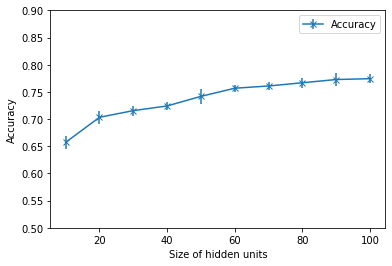

In [8]:
# Plotting the relationship
plt.errorbar(hidden_unit_numbers, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.xlabel('Size of hidden units')
plt.ylim(0.5, 0.9)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

**It can be seen that the accuracy increases when the number of units in the hidden layer increases. The reason is the a model with a bigger number of hiden layer units has a higher complexity to capture the information in data.**

### Increasing the number of hidder layers
Setting the number of hidden layers as two.

In [16]:
# MLP model with two hidden layers

clf_2 = MLPClassifier(hidden_layer_sizes=[100, 100], random_state=42)
scores_mlp_default_2 = cross_val_score(clf_2, X, y, cv=10, verbose=1)
print('Accuracy range for Multi-layer Perceptron: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'
      % (scores_mlp_default_2.min(), scores_mlp_default_2.max(), scores_mlp_default_2.mean(), 
         scores_mlp_default_2.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy range for Multi-layer Perceptron: [0.8715, 0.8984]; mean: 0.8805; std: 0.0081



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.4min finished


In [17]:
# T test to compare accuracy

t, p = ttest_ind(scores_mlp_default_2, scores_mlp_default)
print('t, p %0.4f, %0.4f' % (t,p))

t, p 27.5777, 0.0000


### Choosing solver for the learning process
Trying different solvers in a simple way ['lbfgs','sgd', 'adam'].

In [18]:
# Trying different solvers
cv_scores = []
cv_scores_std = []
solvers = ['lbfgs', 'sgd', 'adam']
for i in solvers:
    clf_mlp = MLPClassifier(solver=i, random_state=42)
    scores = cross_val_score(clf_mlp, X, y, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

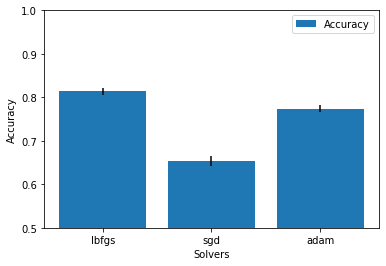

In [19]:
# Plotting the relationship
plt.bar(solvers, cv_scores, yerr=cv_scores_std, label='Accuracy')
plt.xlabel('Solvers')
plt.ylim([0.5, 1])
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

**It can be seen that Stochastic Gradient Descent doesn't perform as well as the other two solvers**. This solver should be used in extremely large databases. 

### Activation functions
Trying activation functions 'identity’, ‘logistic’, ‘tanh’, and ‘relu’ provided by the API.

In [21]:
# Try different activation functions
cv_scores = []
cv_scores_std = []
act_func = ['identity', 'logistic', 'tanh', 'relu']
for i in act_func:
    clf_mlp = MLPClassifier(activation=i, random_state=42)
    scores = cross_val_score(clf_mlp, X, y, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

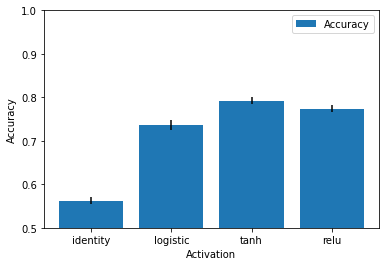

In [22]:
# Plotting the relationship
plt.bar(act_func, cv_scores, yerr=cv_scores_std, label='Accuracy')
plt.xlabel('Activation')
plt.ylim([0.5, 1])
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

### Using different values of Alpha
The parameter alpha is the L2 penalty (regularization term) to overcome the overfitting issue. It balance the error caused the data and that by the model structure (number of weights). 

In [132]:
# Try different regulaization parameters
cv_scores = []
cv_scores_std = []
alphas = [0.0001,0.001,0.01, 0.1,1]
for i in alphas:
    clf_mlp = MLPClassifier(alpha=i, random_state=42)
    scores = cross_val_score(clf_mlp, X, y, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

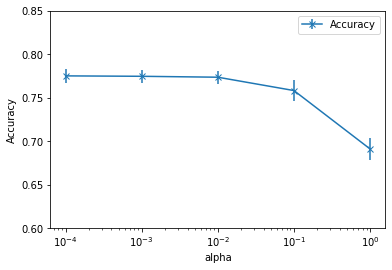

In [134]:
# Plot the relationship
plt.errorbar(alphas, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylim([0.6, 0.85])
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

**It can be seen that when alpha increases, the prediction accuracy drops, showing that the overfitting issue of the model on this dataset is not a big problem.**

### Increasing the number of iterations
This is related to the early stopping technique. 

In [23]:
# Try different number of iterations. Plot the relationship between the performance and the number of iterations.
cv_scores = []
cv_scores_std = []
iter_n = [200, 400, 600, 800]
for i in iter_n:
    clf_mlp = MLPClassifier(max_iter=i, random_state=42)
    scores = cross_val_score(clf_mlp, X, y, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

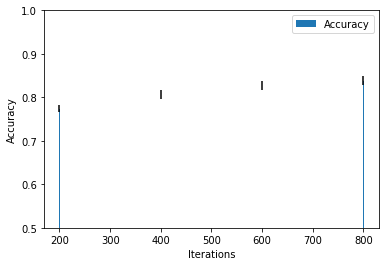

In [25]:
# Plot the relationship
plt.bar(iter_n, cv_scores, yerr=cv_scores_std, label='Accuracy')
plt.xlabel('Iterations')
plt.ylim([0.5, 1])
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

## Comparing with other classification models
### Comparing the results with Naive Bayes (GaussianNB) and K-Nearest Neighbors (K=1)
Compare accuracy scores and use t test to show if their perofrmance has siginficantly different with significance level 0.05.

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Compare with the two models we used before
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors = 1)

scores_gnb = cross_val_score(gnb, X, y, scoring = 'accuracy', cv = 10)
scores_knn = cross_val_score(knn, X, y, scoring = 'accuracy', cv = 10)

In [39]:
print('Accuracy GNB', scores_gnb.mean())

t, p = ttest_ind(scores_mlp_default, scores_gnb)
print('t, p %0.4f, %0.4f' % (t, p))

Accuracy GNB 0.2993288590604027
t, p 96.3360, 0.0000


In [37]:
print('Accuracy KNN', scores_knn.mean())
t, p = ttest_ind(scores_mlp_default, scores_knn)
print('t, p %0.4f, %0.4f' % (t,p))

Accuracy KNN 0.7516778523489933
t, p 4.5321, 0.0003
